# 당뇨병 Deeplearning 
---

In [22]:
import pandas as pd

df = pd.read_csv('../datasets/diabetes.csv', names = ['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'], header=0)
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [25]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [28]:
# 2개 컬럼만 선택, pregnant 기준으로 그룹바이
# df[['pregnant', 'class']].groupby(['pregnant'], as_index=False)

# 위를 평균 낸 뒤 pregnant 기준 오름차순 정렬
df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


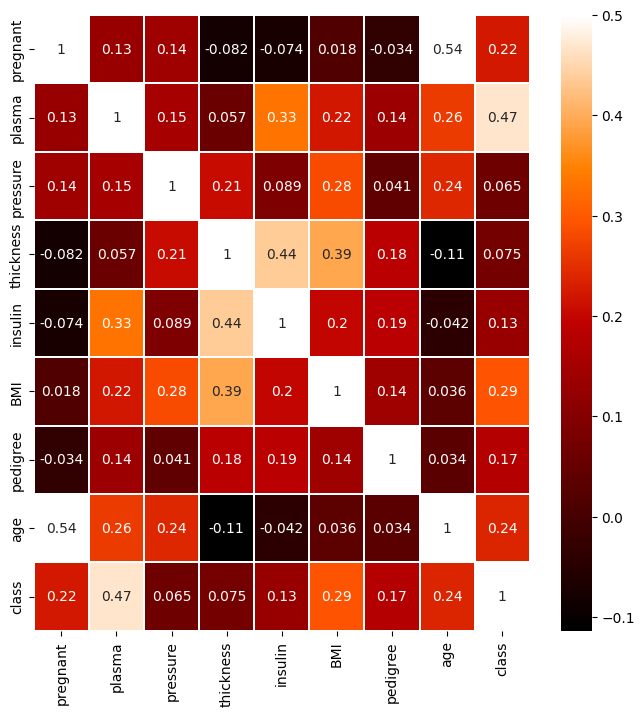

In [29]:
# 데이터 상관관계 표현
# 색상설정은 https://matplotplib.org/users/colormaps.html 에서 확인가능
colormap = plt.cm.gist_heat # 그래프 색상 구성
plt.figure(figsize=(8,8)) # 그래프 크기

# 그래프의 속성 결정
# vmax 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

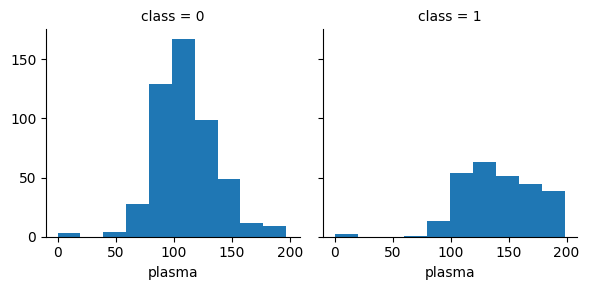

In [30]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

# class = 1인 당뇨병 환자의 경우 plasma 수치가 150이상이 많다.

In [31]:
# 딥러닝을 구동하는 데 필요한 케라스 함수 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리 불러오기
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
numpy.random.seed(3)
tf.random.set_seed(3)

In [36]:
# 데이터를 불러오기 - to array
# 얘는 첫 행에 컬럼명이 있어서 이렇게 안불러짐
dataset = numpy.loadtxt('../datasets/diabetes.csv', delimiter=',', skiprows=1)
X = dataset[:, 0:8]
Y = dataset[:, 8]
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [38]:
# CSV로 불러봐?
dataset = pd.read_csv('../datasets/diabetes.csv')
X = dataset.iloc[:, 0:8]
Y = dataset.iloc[:, 8:]
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [39]:
# 모델을 설정
# 딥러닝 모델에 은닉층 추가할 때는 model.add() 함수 이용
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력
print('\n Accuracy : %.4f' % (model.evaluate(X, Y)[1]))

Epoch 1/200
77/77 [==============================] - 0s 691us/step - loss: 7.8824 - accuracy: 0.4062
Epoch 2/200
77/77 [==============================] - 0s 606us/step - loss: 3.4117 - accuracy: 0.4688
Epoch 3/200
77/77 [==============================] - 0s 605us/step - loss: 1.5631 - accuracy: 0.5651
Epoch 4/200
77/77 [==============================] - 0s 611us/step - loss: 0.9653 - accuracy: 0.6224
Epoch 5/200
77/77 [==============================] - 0s 602us/step - loss: 0.8187 - accuracy: 0.6706
Epoch 6/200
77/77 [==============================] - 0s 606us/step - loss: 0.7405 - accuracy: 0.6849
Epoch 7/200
77/77 [==============================] - 0s 604us/step - loss: 0.8135 - accuracy: 0.6745
Epoch 8/200
77/77 [==============================] - 0s 602us/step - loss: 0.6914 - accuracy: 0.6940
Epoch 9/200
77/77 [==============================] - 0s 597us/step - loss: 0.6758 - accuracy: 0.6771
Epoch 10/200
77/77 [==============================] - 0s 599us/step - loss: 0.6959 - accura

In [40]:
# 모델을 컴파일 합니다
# 이항분류문제로 binary_crossentropy 사용
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행
model.fit(X, Y, epochs=20, batch_size=10)

Epoch 1/20
77/77 [==============================] - 0s 762us/step - loss: 0.5222 - accuracy: 0.7591
Epoch 2/20
77/77 [==============================] - 0s 651us/step - loss: 0.4823 - accuracy: 0.7721
Epoch 3/20
77/77 [==============================] - 0s 631us/step - loss: 0.4908 - accuracy: 0.7578
Epoch 4/20
77/77 [==============================] - 0s 633us/step - loss: 0.4911 - accuracy: 0.7721
Epoch 5/20
77/77 [==============================] - 0s 647us/step - loss: 0.4866 - accuracy: 0.7695
Epoch 6/20
77/77 [==============================] - 0s 653us/step - loss: 0.4875 - accuracy: 0.7721
Epoch 7/20
77/77 [==============================] - 0s 654us/step - loss: 0.5407 - accuracy: 0.7604
Epoch 8/20
77/77 [==============================] - 0s 654us/step - loss: 0.5015 - accuracy: 0.7604
Epoch 9/20
77/77 [==============================] - 0s 653us/step - loss: 0.5138 - accuracy: 0.7669
Epoch 10/20
77/77 [==============================] - 0s 685us/step - loss: 0.4870 - accuracy: 0.7760

---
# 다중분류 문제 : iris
- class 3개 이상

# 1. Setting

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과 출력하기 위해 설정
np.random.seed(3)
tf.random.set_seed(3)

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# 2. Plot

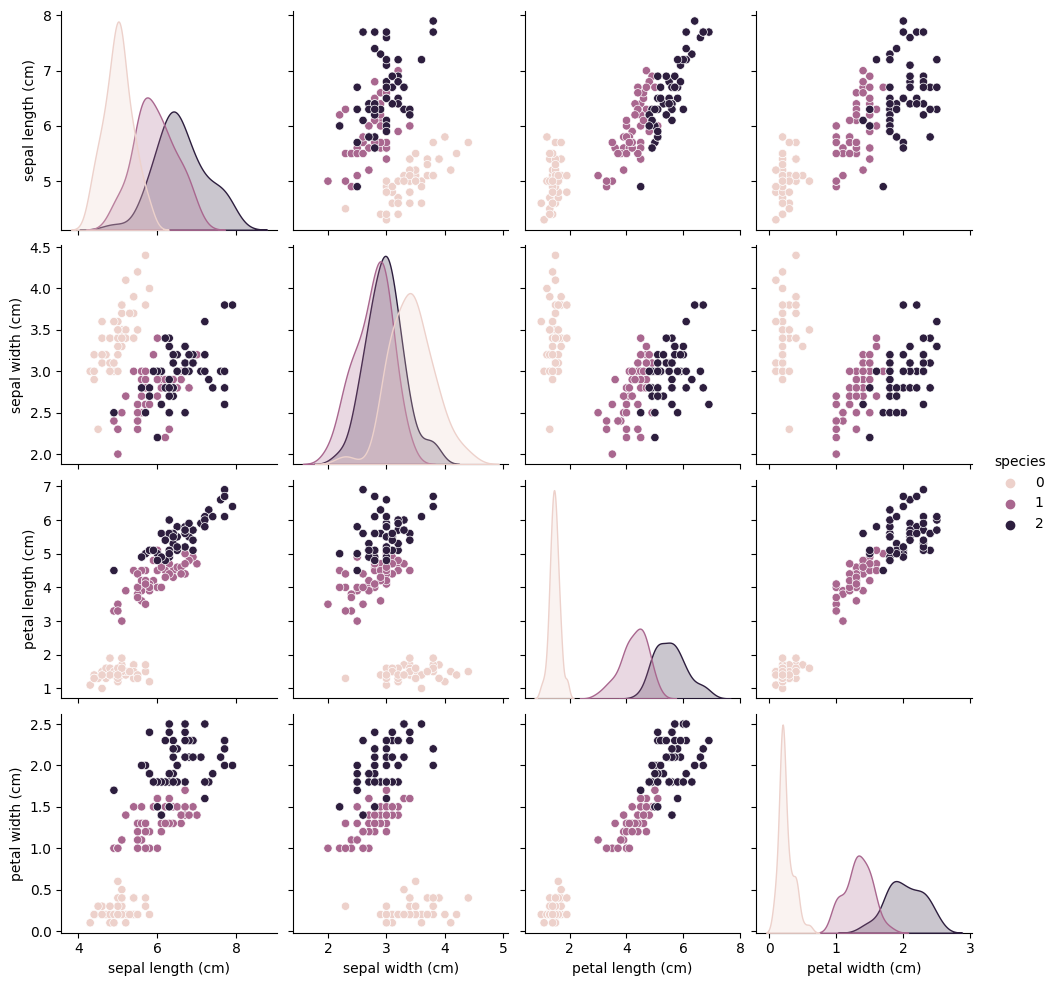

In [6]:
# 그래프를 찍어보고 싶어
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = iris.target

# 그래프로 확인
sns.pairplot(df, hue='species')
plt.show()

# 3. 다중분류 문제해결 : 카테고리화

In [12]:
df["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

class 0,1,2 를 [1,0,0], [0,1,0], [0,0,1]로 카테고리화!

In [7]:
# 100, 010, 001..
y = tf.keras.utils.to_categorical(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# 4. Model

## 4-1. layer 쌓기

In [8]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu')) 
model.add(Dense(3, activation='softmax')) 
# 최종 출력값이 3개 중 하나여야 해서 출력층 노드 수 3, 활성화 함수 softmax

2022-11-03 14:05:34.354916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 4-2. 컴파일 & 학습 & 평가

In [9]:
# 모델 컴파일 후 실행
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X, y, epochs=50, batch_size=1)

Epoch 1/50
150/150 [==============================] - 0s 566us/step - loss: 0.9857 - accuracy: 0.5733
Epoch 2/50
150/150 [==============================] - 0s 554us/step - loss: 0.6300 - accuracy: 0.6667
Epoch 3/50
150/150 [==============================] - 0s 539us/step - loss: 0.5509 - accuracy: 0.7533
Epoch 4/50
150/150 [==============================] - 0s 531us/step - loss: 0.5033 - accuracy: 0.7067
Epoch 5/50
150/150 [==============================] - 0s 576us/step - loss: 0.4623 - accuracy: 0.8467
Epoch 6/50
150/150 [==============================] - 0s 542us/step - loss: 0.4230 - accuracy: 0.9200
Epoch 7/50
150/150 [==============================] - 0s 538us/step - loss: 0.3900 - accuracy: 0.9067
Epoch 8/50
150/150 [==============================] - 0s 525us/step - loss: 0.3707 - accuracy: 0.9267
Epoch 9/50
150/150 [==============================] - 0s 519us/step - loss: 0.3457 - accuracy: 0.9467
Epoch 10/50
150/150 [==============================] - 0s 528us/step - loss: 0.322

In [13]:
# 결과 출력
print('\n Accuracy : %.4f' % (model.evaluate(X, y)[1]))

5/5 [==============================] - 0s 917us/step - loss: 0.0815 - accuracy: 0.9800

 Accuracy : 0.9800
